In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [11]:
from sklearn.datasets import load_boston
df = pd.read_csv(load_boston()['filename'], skiprows=1)

FileNotFoundError: [Errno 2] No such file or directory: 'boston_house_prices.csv'

In [ ]:
df.head()

In [ ]:
x = df.drop(columns=['MEDV'])
y = df['MEDV']

#### Функция для получения качества модели

In [23]:
def get_score(x, y, depth=None, split=2, leaf=1, criterion = 'mse'):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 
    
    tree_reg = DecisionTreeRegressor(criterion = criterion, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf) 
    
    tree_reg.fit(x_train, y_train)
    err1 = tree_reg.score(x_train, y_train)
    err2 = tree_reg.score(x_test, y_test)
    return (err1, err2)

#### Функция для выявления лучшего кол-ва ответов в листе

In [24]:
def best_amount_leaf(x, y):
    num = np.arange(1, 15, 1)
    err1 = []
    err2 = []
    for i in num:
        scores = get_score(x, y, leaf=i)
        err1.append(scores[0])
        err2.append(scores[1])
   
    ind = np.argmax(err2)+num[0]
    max_ = max(err2)
    plt.plot(ind, max_, 'go')
    plt.plot(num, err1)
    plt.plot(num, err2)
    plt.grid()
    plt.show()

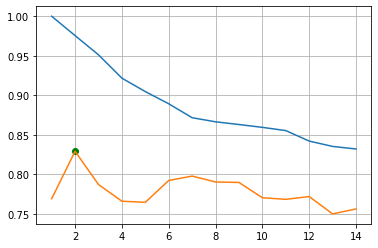

In [25]:
best_amount_leaf(x,y)

#### Из графика видно, что лучшее кол-во ответов в листе равно 2

#### Функция для определения максимальной глубины, учитывая leaf = 2

In [26]:
def best_depth(x, y, leaf = 2):
    num = np.arange(3, 30, 1)
    err1 = []
    err2 = []
    for i in num:
        scores = get_score(x, y, leaf=leaf, depth = i)
        err1.append(scores[0])
        err2.append(scores[1])
    
    ind = np.argmax(err2)+num[0]
    max_ = max(err2)
    plt.plot(ind, max_, 'go')
    plt.plot(num, err1)
    plt.plot(num, err2)
    
    plt.grid()
    plt.show()

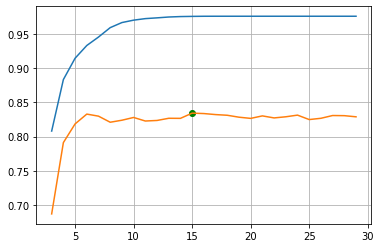

In [39]:
best_depth(x,y)

#### Каждый раз оптимальная глубина разная, доверимся модели

#### Функция для определения лучшего критерия дерева решений

In [27]:
def best_criterion(x, y, leaf=2, depth=None):
    criteries = ['mse', 'friedman_mse', 'mae', 'poisson']
    err1 = []
    err2 = []
    for i in criteries:
        scores = get_score(x, y, leaf=leaf, depth = depth, criterion = i)
        err1.append(scores[0])
        err2.append(scores[1])
    
    ind = np.argmax(err2)
    max_ = max(err2)
    plt.plot(ind, max_, 'go')
    plt.plot(criteries, err1)
    plt.plot(criteries, err2)
    plt.grid()
    plt.show()

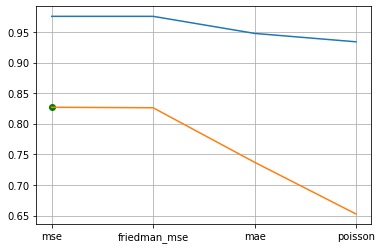

In [28]:
best_criterion(x, y)

#### Лучший критерий - MSE

#### Посмотрим важность параметров

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=2, criterion = "mse")
model.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2)

In [1]:
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(x.columns)),x.columns)
plt.show()

NameError: name 'plt' is not defined

#### Видим, что достаточно важных параметров 7: 'LSTAT', 'B', 'PTRATIO', 'DIS', 'AGE', 'RM', 'CRIM'

#### Однако со всеми параметрами модель отрабатывает лучше

In [31]:
get_score(x, y, leaf = 2)

(0.9754977594976396, 0.8371969943948396)

In [32]:
get_score(df[['LSTAT', 'B', 'PTRATIO', 'DIS', 'AGE', 'RM', 'CRIM']], y, leaf = 2)

(0.9748663648324145, 0.7955364958065216)

#### Теперь обработаем некоторые наши переменные

#### Результат практически тот же

In [33]:
x1 = pd.get_dummies(x, columns=['RAD'])

In [34]:
x2 = pd.get_dummies(x1, columns=['TAX'])

In [35]:
get_score(x2, y, leaf = 2)

(0.975164994429377, 0.8257589108787818)

#### Визуализация дерева решений

[Text(143.79768573113208, 211.4, 'X[12] <= 7.865\nmse = 88.144\nsamples = 339\nvalue = 22.971'),
 Text(66.01245283018868, 199.32, 'X[5] <= 7.437\nmse = 78.197\nsamples = 106\nvalue = 32.424'),
 Text(42.323773584905666, 187.24, 'X[7] <= 1.557\nmse = 39.805\nsamples = 84\nvalue = 29.286'),
 Text(39.79698113207547, 175.16, 'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(44.85056603773585, 175.16, 'X[5] <= 6.797\nmse = 24.799\nsamples = 81\nvalue = 28.519'),
 Text(24.63622641509434, 163.07999999999998, 'X[5] <= 6.542\nmse = 9.393\nsamples = 44\nvalue = 25.28'),
 Text(13.897358490566038, 151.0, 'X[7] <= 9.006\nmse = 2.404\nsamples = 23\nvalue = 23.396'),
 Text(11.37056603773585, 138.92000000000002, 'X[11] <= 359.1\nmse = 1.341\nsamples = 21\nvalue = 23.695'),
 Text(8.84377358490566, 126.84, 'mse = 1.823\nsamples = 2\nvalue = 25.65'),
 Text(13.897358490566038, 126.84, 'X[6] <= 25.0\nmse = 0.846\nsamples = 19\nvalue = 23.489'),
 Text(7.5803773584905665, 114.75999999999999, 'X[1] <= 26.0\nmse =

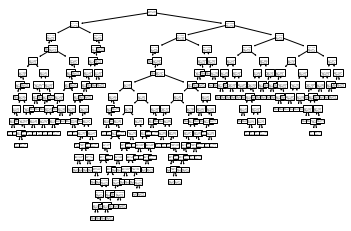

In [13]:
from sklearn import tree
tree.plot_tree(model)

In [15]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found